In [2]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd


[ WARN:0@343.041] global loadsave.cpp:248 findDecoder imread_('/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/sample.pdf'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

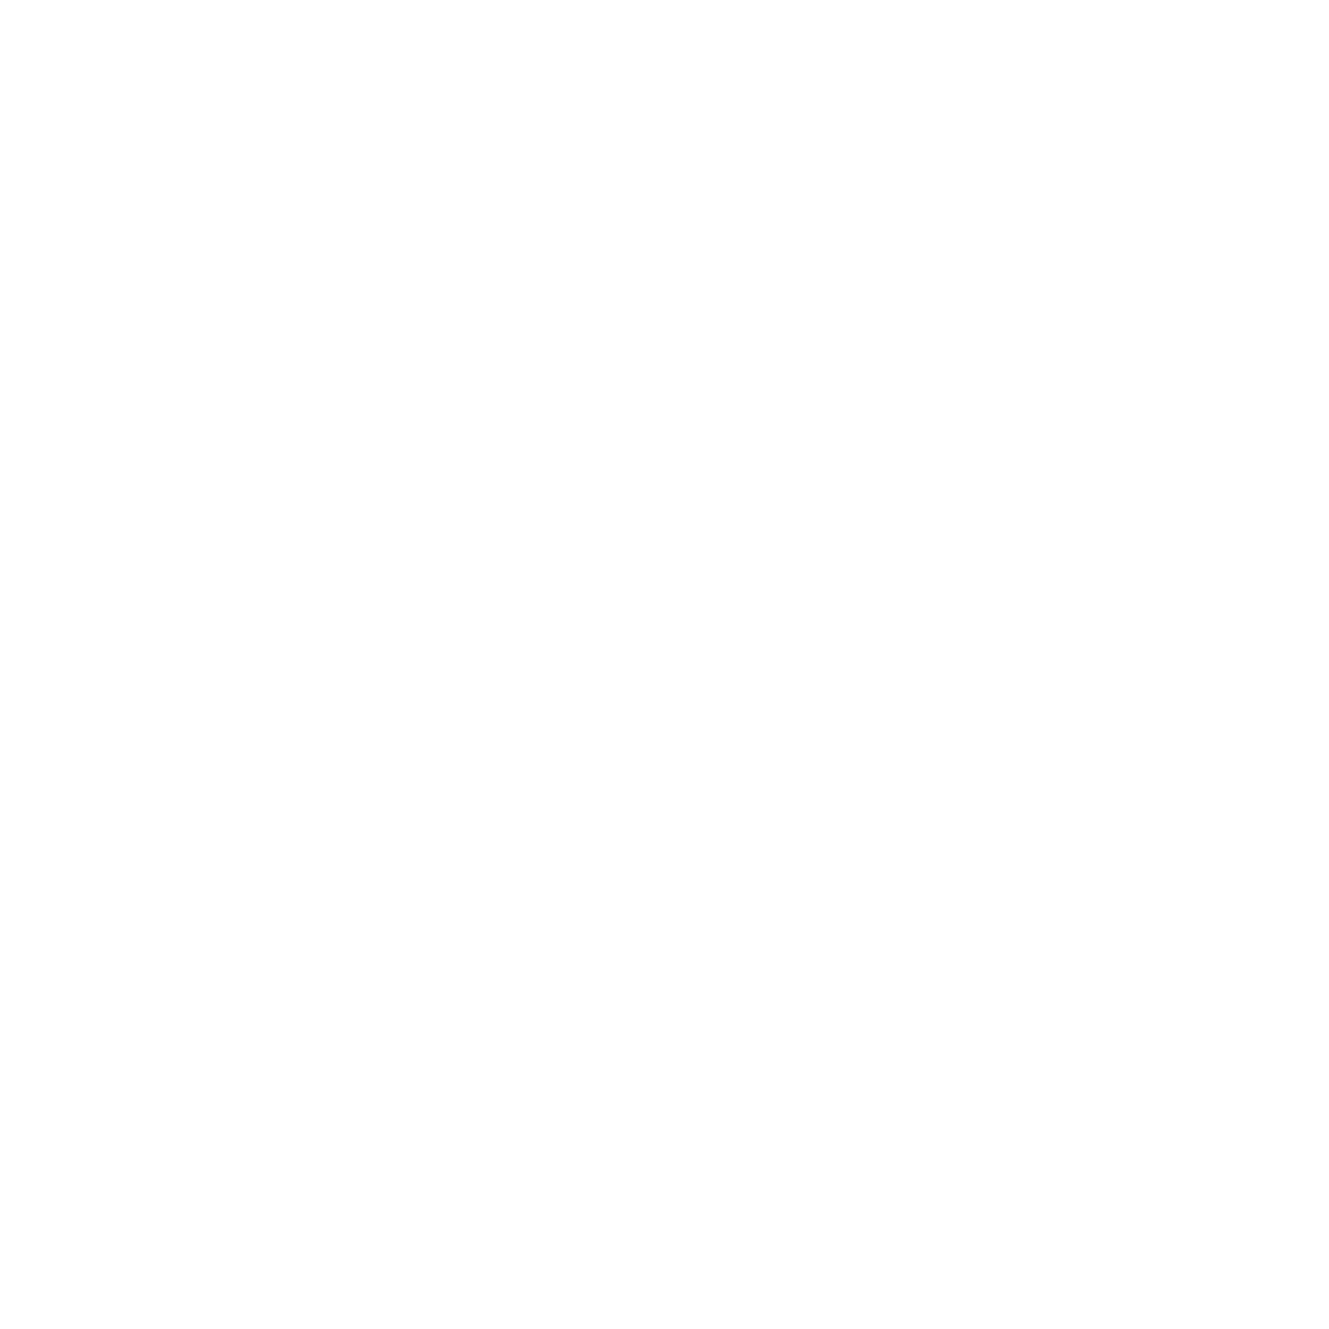

In [8]:
image_path = "/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/sample.png"
image = cv2.imread(image_path)
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)


In [6]:
cfg = ["USE_TABLE_SEGMENTATION=False", "USE_OCR=False",]
analyzer = dd.get_dd_analyzer(config_overwrite=cfg)

[0822 10:38.46 @dd.py:379]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': None,
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP': 60},
                 'WEIGHTS': 'item/d2_model_1639999_item_inf_only.pt',
         

[0822 10:38.56 @config.py:66]  WRN  Loading config /home/jonasklotz/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[0822 10:38.57 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /home/jonasklotz/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0822 10:38.57 @checkpoint.py:150]  INF  [Checkpointer] Loading from /home/jonasklotz/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...


In [17]:
pdf_path = "/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/sample2.pdf"

df = analyzer.analyze(path=pdf_path)
df.reset_state()  # This method must be called just before starting the iteration. It is part of the API.


In [18]:
doc=iter(df)
page = next(doc)


[0822 10:49.39 @doctectionpipe.py:84]  INF  Processing sample2_0.pdf
[0822 10:50.23 @context.py:126]  INF  ImageLayoutService total: 4.5527 sec.


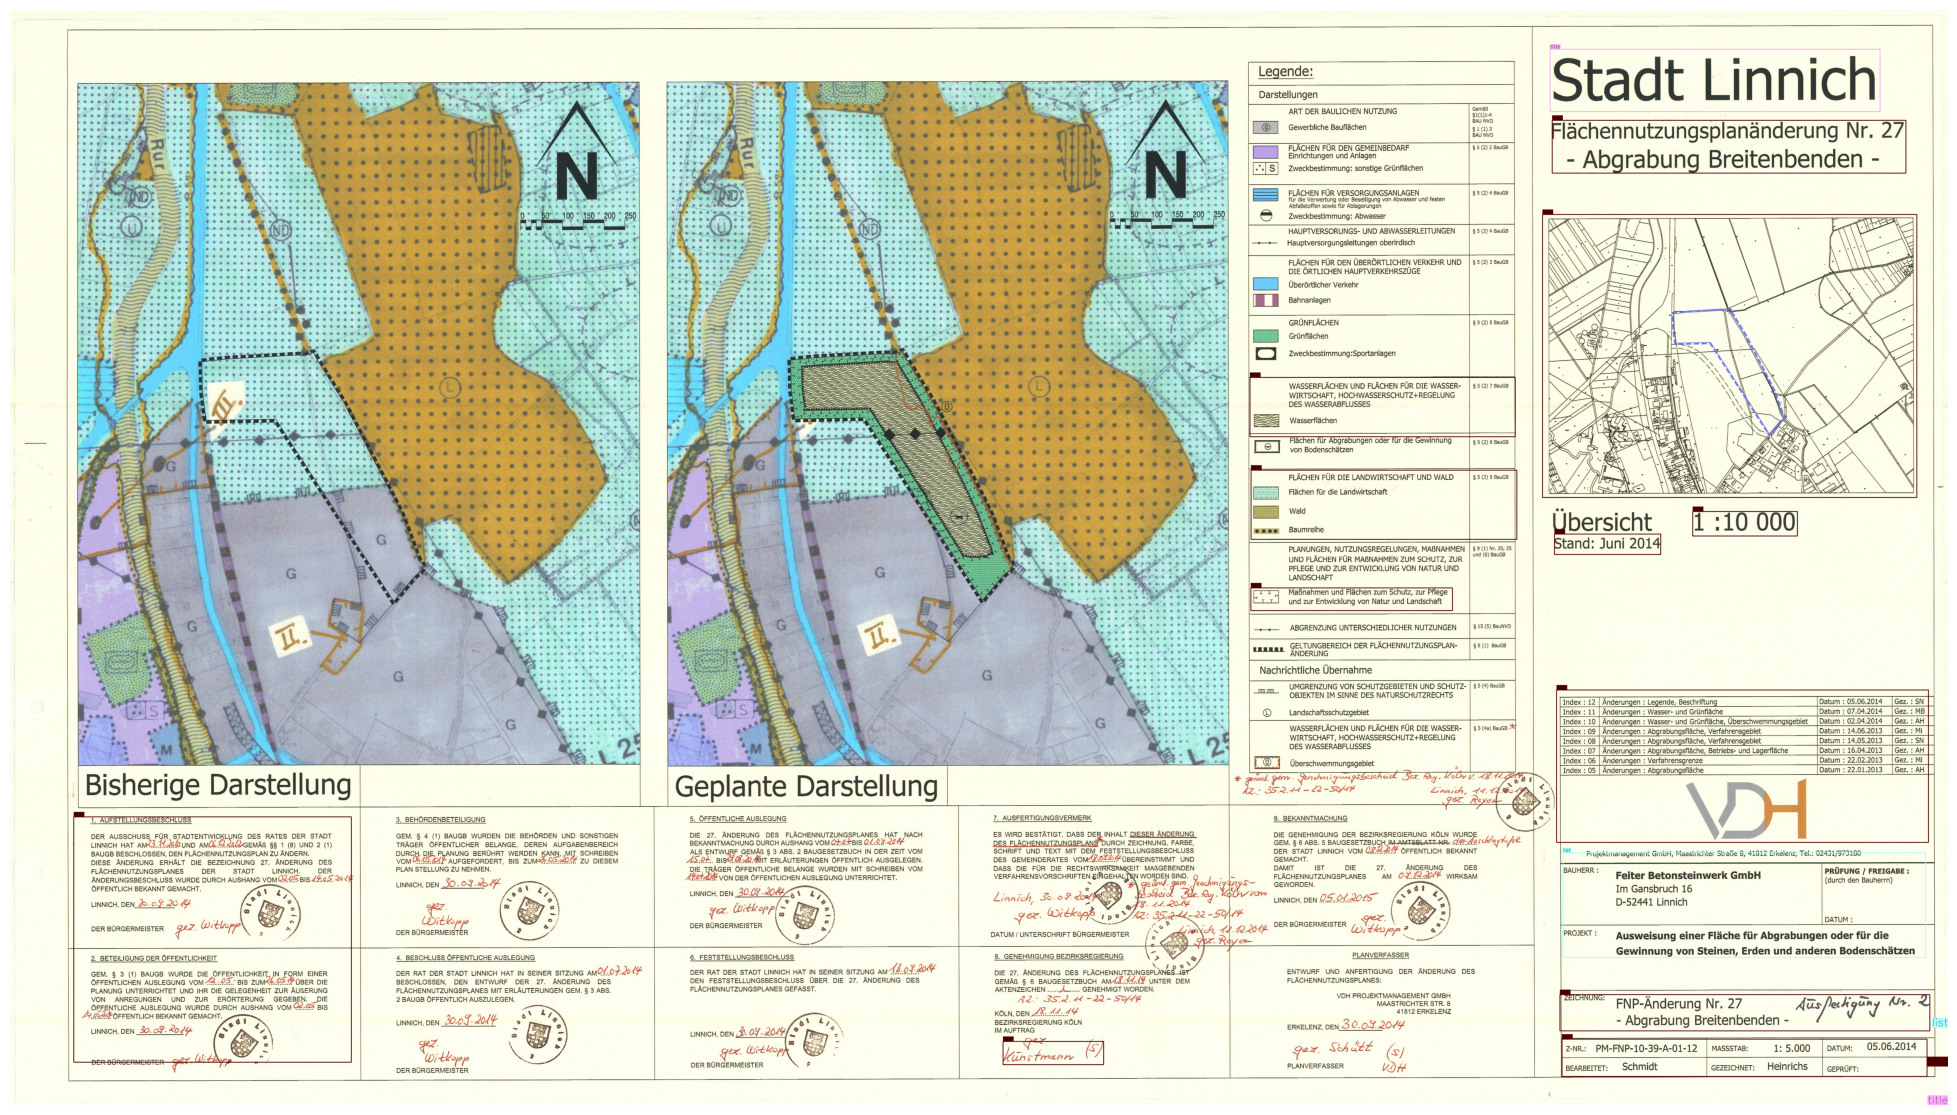

In [19]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)
    

In [15]:
print(page.text)

In [16]:
analyzer.get_pipeline_info()

{0: 'image_weights_layout_d2_model_0829999_layout_inf_only.pt'}